In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
list_of_dicts=[{"name": "Ginger", "breed": "Dachshund", "height_cm": 22, "weight_kg": 10, "date_of_birth": "2019-03-14"},
              
                {"name":"Scout", "breed": "Dalmatian", "height_cm":59, "weight_kg":25, "date_of_birth": "2019-05-09"}
              ]

In [5]:
new_dogs=pd.DataFrame(list_of_dicts)

In [6]:
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


In [7]:
new_dogs.values

array([['Ginger', 'Dachshund', 22, 10, '2019-03-14'],
       ['Scout', 'Dalmatian', 59, 25, '2019-05-09']], dtype=object)

In [8]:
new_dogs.columns

Index(['name', 'breed', 'height_cm', 'weight_kg', 'date_of_birth'], dtype='object')

In [10]:
new_dogs.sort_values('weight_kg', ascending=False)

,name,breed,height_cm,weight_kg,date_of_birth
1,Scout,Dalmatian,59,25,2019-05-09
0,Ginger,Dachshund,22,10,2019-03-14


In [11]:
new_dogs['breed']

0    Dachshund
1    Dalmatian
Name: breed, dtype: object

In [12]:
new_dogs[['breed', 'height_cm']]

,breed,height_cm
0,Dachshund,22
1,Dalmatian,59


In [15]:
new_dogs[new_dogs['height_cm'] > 30]

,name,breed,height_cm,weight_kg,date_of_birth
1,Scout,Dalmatian,59,25,2019-05-09


In [14]:
new_dogs[new_dogs['breed']=='Dalmatian']

,name,breed,height_cm,weight_kg,date_of_birth
1,Scout,Dalmatian,59,25,2019-05-09


In [16]:
new_dogs[new_dogs['date_of_birth'] > "2015-01-01"]

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


In [18]:
is_lab=new_dogs['breed']=='Dalmatian'
is_wiegth=new_dogs['weight_kg'] ==25
new_dogs[is_lab & is_wiegth]

,name,breed,height_cm,weight_kg,date_of_birth
1,Scout,Dalmatian,59,25,2019-05-09


In [21]:
mm=new_dogs['name'].isin(['Scout'])
new_dogs[mm]

,name,breed,height_cm,weight_kg,date_of_birth
1,Scout,Dalmatian,59,25,2019-05-09


In [22]:
new_dogs['height_m']=new_dogs['height_cm']/100

In [23]:
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth,height_m
0,Ginger,Dachshund,22,10,2019-03-14,0.22
1,Scout,Dalmatian,59,25,2019-05-09,0.59


In [24]:
new_dogs['bmi']= new_dogs['weight_kg']/new_dogs['height_m'] **2

In [25]:
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Ginger,Dachshund,22,10,2019-03-14,0.22,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,0.59,71.818443


In [27]:
new_dogs.describe().T

,count,mean,std,min,25%,50%,75%,max
height_cm,2.0,40.500000,26.162951,22.000000,31.250000,40.500000,49.750000,59.00000
weight_kg,2.0,17.500000,10.606602,10.000000,13.750000,17.500000,21.250000,25.00000
height_m,2.0,0.405000,0.261630,0.220000,0.312500,0.405000,0.497500,0.59000
bmi,2.0,139.215007,95.313134,71.818443,105.516725,139.215007,172.913288,206.61157


In [28]:
def pact30(column):
    return column.quantile(0.3)

In [29]:
pact30(new_dogs['height_cm'])

33.099999999999994

In [30]:
new_dogs['weight_kg'].agg(pact30)

14.5

In [31]:
new_dogs[['weight_kg', 'height_cm']].agg(pact30)

weight_kg    14.5
height_cm    33.1
dtype: float64

In [32]:
def pact40(column):
    return column.quantile(0.4)

In [33]:
new_dogs[['weight_kg', 'height_cm']].agg([pact30, pact40])

,weight_kg,height_cm
pact30,14.5,33.1
pact40,16.0,36.8


In [34]:
new_dogs['weight_kg'].cumsum()

0    10
1    35
Name: weight_kg, dtype: int64

In [35]:
new_dogs.drop_duplicates(subset='name')

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Ginger,Dachshund,22,10,2019-03-14,0.22,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,0.59,71.818443


In [40]:
new_dogs['breed'].value_counts(sort=True, normalize=True)

Dalmatian    0.5
Dachshund    0.5
Name: breed, dtype: float64

In [41]:
#Summary by group

In [43]:
new_dogs[new_dogs['weight_kg']==25]['height_cm'].mean()

59.0

In [51]:
new_dogs.groupby('name')['height_cm'].mean()

name
Ginger    22
Scout     59
Name: height_cm, dtype: int64

In [52]:
new_dogs.groupby('name')['height_cm'].agg([min,max,sum])

,min,max,sum
name,,,
Ginger,22,22,22
Scout,59,59,59


In [53]:
new_dogs.groupby(['name','breed'])['height_cm'].agg([min,max,sum])

,,min,max,sum
name,breed,,,
Ginger,Dachshund,22,22,22
Scout,Dalmatian,59,59,59


In [54]:
#sort and slice with index

In [57]:
dogs_srt=new_dogs.set_index(['breed', 'name']).sort_index()
dogs_srt

,,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,name,,,,,
Dachshund,Ginger,22,10,2019-03-14,0.22,206.611570
Dalmatian,Scout,59,25,2019-05-09,0.59,71.818443


In [58]:
new_dogs.loc[:, "name": "weight_kg"]

,name,breed,height_cm,weight_kg
0,Ginger,Dachshund,22,10
1,Scout,Dalmatian,59,25


In [59]:
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Ginger,Dachshund,22,10,2019-03-14,0.22,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,0.59,71.818443


In [66]:
date_s=new_dogs.set_index('date_of_birth').sort_index()

In [67]:
date_s

,name,breed,height_cm,weight_kg,height_m,bmi
date_of_birth,,,,,,
2019-03-14,Ginger,Dachshund,22,10,0.22,206.611570
2019-05-09,Scout,Dalmatian,59,25,0.59,71.818443


In [68]:
date_s.loc['2019': '2019']

,name,breed,height_cm,weight_kg,height_m,bmi
date_of_birth,,,,,,


In [73]:
new_dogs.iloc[:, 0:3]

,name,breed,height_cm
0,Ginger,Dachshund,22
1,Scout,Dalmatian,59


In [74]:
#Missing data

In [75]:
new_dogs.isna()

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False


In [76]:
new_dogs.isna().any()

name             False
breed            False
height_cm        False
weight_kg        False
date_of_birth    False
height_m         False
bmi              False
dtype: bool

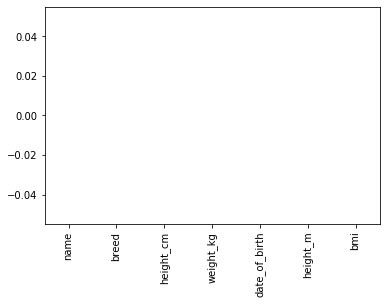

In [79]:
new_dogs.isna().sum().plot(kind='bar')
plt.show()

In [80]:
new_dogs.dropna()

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Ginger,Dachshund,22,10,2019-03-14,0.22,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,0.59,71.818443


In [81]:
new_dogs.fillna(0)

,name,breed,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Ginger,Dachshund,22,10,2019-03-14,0.22,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,0.59,71.818443


In [82]:
#pivot table
new_dogs.pivot_table(values='height_cm', index='date_of_birth')

,height_cm
date_of_birth,
2019-03-14,22
2019-05-09,59


In [84]:
new_dogs.pivot_table(values='height_cm', index='date_of_birth', aggfunc=np.mean)

,height_cm
date_of_birth,
2019-03-14,22
2019-05-09,59


In [85]:
new_dogs.mean(axis='columns')

0    59.707893
1    39.102111
dtype: float64

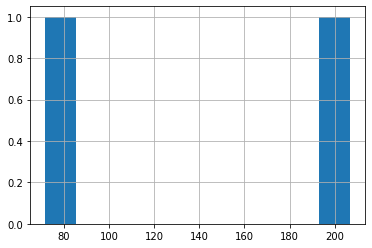

In [90]:
new_dogs['bmi'].hist()

In [91]:
avg_weight=new_dogs.groupby('name')['bmi'].mean()

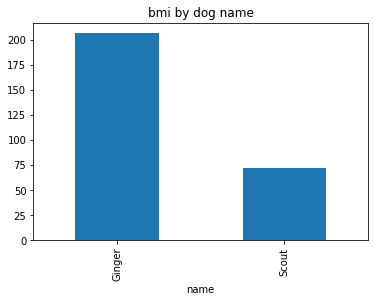

In [94]:
avg_weight.plot(kind='bar', title='bmi by dog name')
plt.show()

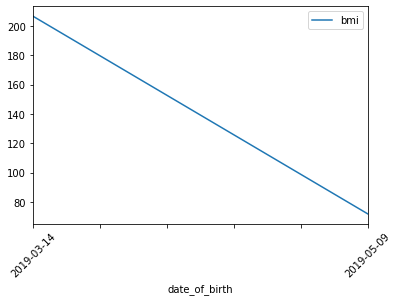

In [97]:
new_dogs.plot(x='date_of_birth', y='bmi', kind='line', rot=45)
plt.show()

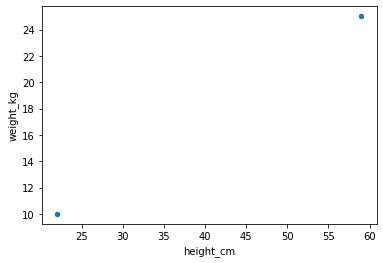

In [98]:
new_dogs.plot(x='height_cm', y='weight_kg', kind='scatter')
plt.show()